In [1]:
from __future__ import print_function

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

In [11]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [12]:
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [13]:
print(load_digits.__doc__)

Load and return the digits dataset (classification).

    Each datapoint is a 8x8 image of a digit.

    =================   ==============
    Classes                         10
    Samples per class             ~180
    Samples total                 1797
    Dimensionality                  64
    Features             integers 0-16
    =================   ==============

    Read more in the :ref:`User Guide <datasets>`.

    Parameters
    ----------
    n_class : integer, between 0 and 10, optional (default=10)
        The number of classes to return.

    return_X_y : boolean, default=False.
        If True, returns ``(data, target)`` instead of a Bunch object.
        See below for more information about the `data` and `target` object.

        .. versionadded:: 0.18

    Returns
    -------
    data : Bunch
        Dictionary-like object, the interesting attributes are:
        'data', the data to learn, 'images', the images corresponding
        to each sample, 'target', the cla

In [14]:
print(digits.data)

[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]


In [15]:
print(digits.data.shape)

(1797, 64)


In [16]:
print(digits.images.shape)

(1797, 8, 8)


In [17]:
print(digits.images[0])

[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]


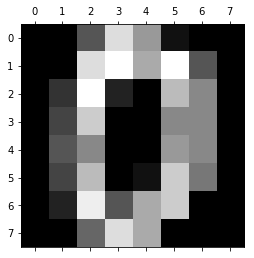

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[0])

In [19]:
print(digits.target.shape)
print(digits.target[:15])

(1797,)
[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4]


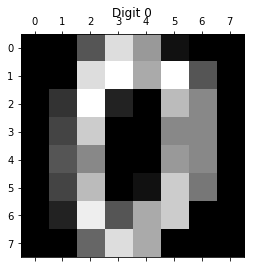

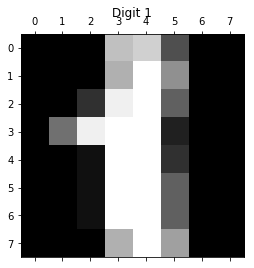

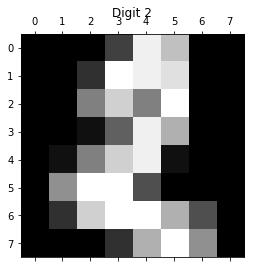

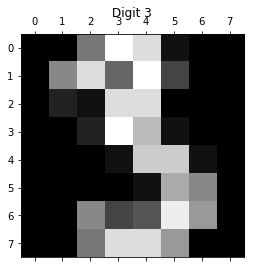

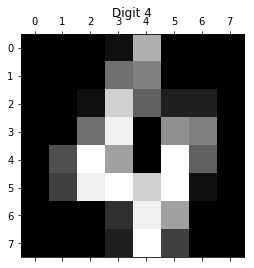

In [20]:
for i in range(5):
    image = digits.images[i]
    digitname = digits.target[i]
    plt.matshow(image)
    plt.title("Digit %s" % digitname)

(array([ 178.,  182.,  177.,  183.,  181.,  182.,  181.,  179.,  174.,  180.]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ]),
 <a list of 10 Patch objects>)

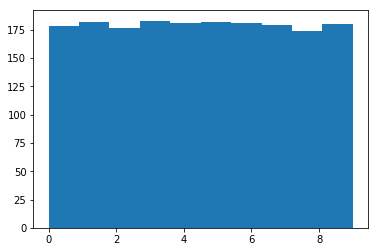

In [21]:
plt.hist(digits.target, bins=10)

In [22]:
print(digits.data[0])

[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.   5.
   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.   0.   8.
   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.  11.   0.   1.
  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.   0.   0.   6.  13.
  10.   0.   0.   0.]


In [23]:
import numpy as np
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(digits.data, digits.target)


/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [24]:
from sklearn import naive_bayes
from sklearn.metrics import accuracy_score, classification_report

model = naive_bayes.GaussianNB()
model.fit(X_train, Y_train)

print("Accuracy: %.3f"% accuracy_score(Y_test, model.predict(X_test)))
print(classification_report(Y_test, model.predict(X_test)))


Accuracy: 0.796
             precision    recall  f1-score   support

          0       1.00      0.96      0.98        49
          1       0.70      0.40      0.51        47
          2       0.90      0.78      0.84        46
          3       0.88      0.61      0.72        46
          4       0.95      0.86      0.90        43
          5       0.93      0.90      0.92        42
          6       0.96      1.00      0.98        43
          7       0.70      0.98      0.82        46
          8       0.43      0.88      0.58        42
          9       0.97      0.61      0.75        46

avg / total       0.84      0.80      0.80       450



In [25]:
model = naive_bayes.BernoulliNB()
model.fit(X_train, Y_train)

print("Accuracy: %.3f"% accuracy_score(Y_test, model.predict(X_test)))
print(classification_report(Y_test, model.predict(X_test)))


Accuracy: 0.827
             precision    recall  f1-score   support

          0       1.00      0.96      0.98        49
          1       0.73      0.51      0.60        47
          2       0.89      0.85      0.87        46
          3       0.84      0.83      0.84        46
          4       0.85      0.93      0.89        43
          5       0.88      0.90      0.89        42
          6       1.00      0.93      0.96        43
          7       0.85      0.96      0.90        46
          8       0.53      0.67      0.59        42
          9       0.74      0.74      0.74        46

avg / total       0.83      0.83      0.83       450



In [26]:
model = naive_bayes.MultinomialNB()
model.fit(X_train, Y_train)

print("Accuracy: %.3f"% accuracy_score(Y_test, model.predict(X_test)))
print(classification_report(Y_test, model.predict(X_test)))


Accuracy: 0.891
             precision    recall  f1-score   support

          0       1.00      0.96      0.98        49
          1       0.83      0.72      0.77        47
          2       0.89      0.91      0.90        46
          3       1.00      0.83      0.90        46
          4       0.95      0.98      0.97        43
          5       0.97      0.88      0.93        42
          6       0.98      0.98      0.98        43
          7       0.87      1.00      0.93        46
          8       0.68      0.86      0.76        42
          9       0.80      0.80      0.80        46

avg / total       0.90      0.89      0.89       450



In [27]:
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import scale

X_train = scale(X_train)
X_test = scale(X_test)

model = LinearSVC()
model.fit(X_train, Y_train)

print("Accuracy: %.3f"% accuracy_score(Y_test, model.predict(X_test)))
print(classification_report(Y_test, model.predict(X_test)))



Accuracy: 0.964
             precision    recall  f1-score   support

          0       1.00      0.96      0.98        49
          1       0.96      1.00      0.98        47
          2       0.98      1.00      0.99        46
          3       0.95      0.91      0.93        46
          4       0.98      0.98      0.98        43
          5       0.93      0.98      0.95        42
          6       1.00      1.00      1.00        43
          7       0.96      1.00      0.98        46
          8       0.90      0.86      0.88        42
          9       0.98      0.96      0.97        46

avg / total       0.96      0.96      0.96       450



In [26]:
model = SVC()
model.fit(X_train, Y_train)

print("Accuracy: %.3f"% accuracy_score(Y_test, model.predict(X_test)))
print(classification_report(Y_test, model.predict(X_test)))



Accuracy: 0.987
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        45
          1       1.00      1.00      1.00        64
          2       0.97      0.97      0.97        36
          3       0.98      1.00      0.99        42
          4       1.00      0.98      0.99        43
          5       0.98      1.00      0.99        40
          6       1.00      1.00      1.00        50
          7       1.00      1.00      1.00        48
          8       0.92      1.00      0.96        35
          9       1.00      0.91      0.96        47

avg / total       0.99      0.99      0.99       450

